In [ ]:
Clustering: Hierarchical 
Dataset : hitters.csv
Apply Data pre-processing (Label Encoding , Data 
Transformation….) techniques if necessary.
Apply Hierarchical clustering algorithms (based on CRuns column) to 
find the group of players.

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('Hitters.csv')

In [3]:
data.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [9]:
numeric_imputer = SimpleImputer(strategy = 'mean')

In [7]:
numeric_cols = ['Salary']

In [10]:
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

In [11]:
data.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [12]:
label_encoder = LabelEncoder()

In [14]:
data['League'] = label_encoder.fit_transform(data['League'])

In [15]:
data['Division'] = label_encoder.fit_transform(data['Division'])

In [16]:
data['NewLeague'] = label_encoder.fit_transform(data['NewLeague'])

In [17]:
data_encoded = data.copy()

In [20]:
numeric_data = data.drop(['League','Division','NewLeague'],axis = 1)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_data = scaler.fit_transform(numeric_data)

In [23]:
X = data_encoded[['CRuns']]

In [24]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [26]:
data['cluster'] = cluster.fit_predict(X)

C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='CRuns', ylabel='Salary'>

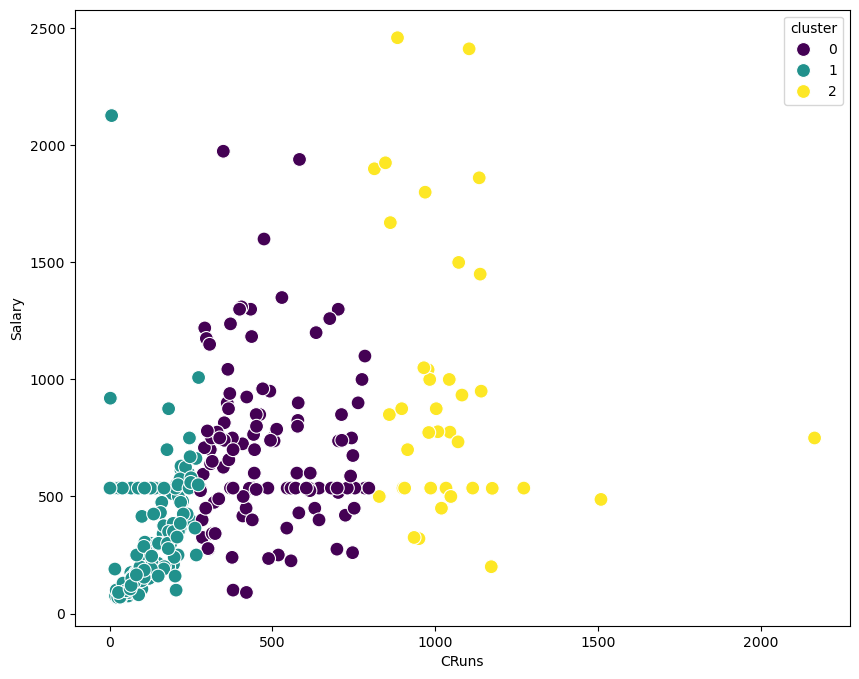

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'CRuns', y = 'Salary', hue = 'cluster', data = data,palette='viridis' ,s = 100)